In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer, Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch
import re
from transformers import TrainerCallback, TrainingArguments, Trainer
import matplotlib.pyplot as plt
import numpy as np
import os
torch.manual_seed(42)
torch.cuda.manual_seed(42)
np.random.seed(42)

/home/dante/nn/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
model = GPT2LMHeadModel.from_pretrained("ai-forever/rugpt3small_based_on_gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("ai-forever/rugpt3small_based_on_gpt2")

In [5]:
device = "cuda"
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50264, 768)
    (wpe): Embedding(2048, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50264, bias=False)
)

# Выберем 5 стихотворений и сгенерируем текст с помощью модели GPT-3.

1

Парижские "Последние новости" пишут: 

"Шаляпин пожертвовал священнику 

Георгию Спасскому на русских 

безработных в Париже 5000 франков. 

1000 отдана бывшему морскому агенту, 

капитану 1-го ранга Дмитриеву, 

1000 роздана Спасским лицам, ему 

знакомым, по его усмотрению, и 

3000 - владыке митрополиту 

Евлогию". 

Вынув бумажник из-под хвостика фрака, добрейший 

Федор Иваныч Шаляпин на русских безработных 

пять тысяч франков бросил 

на дно 

поповской шляпы. Ишь сердобольный, 

как заботится! Конешно, 

плохо, если жмет безработица. Но... 

удивляют получающие пропитанье. Почему 

у безработных званье капитанье? Ведь не станет 

лезть 

морское капитанство на завод труда 

и в шахты пота. Так чего же ждет 

Евлогиева паства, и какая 

ей 

нужна работа? Вот если 

за нынешней грозою нотною пойдет война 

в орудийном аду шаляпинские безработные живо 

себе 

работу найдут. Впервые 

тогда 

комсомольская масса, раскрыв 

пробитые пулями уши, сведет 

знакомство 

с шаляпинским басом через бас 

белогвардейских пушек. Когда ж 

полями, 

кровью политыми, рабочие 

бросят руки и ноги,вспомним тогда 

безработных митрополита Евлогия. Говорят, 

артист 

большой ребенок. Не знаю, 

есть ли 

у Шаляпина бонна. Но если 

бонны 

нету с ним, мы вместо бонны 

ему объясним. Есть класс пролетариев 

миллиононногорбый и те, 

кто покорен фаустовскому тельцу. На бой 

последний 

класса оба сегодня 

сошлись 

лицом к лицу. И песня, 

и стих 

это бомба и знамя, и голос певца 

подымает класс, и тот, 

кто сегодня 

поет не с нами, тот 

против нас. А тех, 

кто под ноги атакующим бросится, с дороги 

уберет 

рабочий пинок. С барина 

с белого 

сорвите, наркомпросцы, народного артиста 

красный венок! 

2

НУ, ЧТО Ж! 

Раскрыл я 

с тихим шорохом глаза страниц... И потянуло 

порохом от всех границ. 

Не вновь, 

которым за двадцать, в грозе расти. Нам не с чего 

радоваться, но нечего 

грустить. Бурна вода истории. Угрозы 

и войну мы взрежем 

на просторе, как режет 

киль волну. 

3

Куда бы 

ты 

ни направил разбег, и как ни ерзай, и где ногой ни ступи,есть Марксов проспект, и улица Розы, и Луначарского 

переулок или тупик. Где я? 

В Ялте или в Туле? Я в Москве 

или в Казани? Разберешься? 

- Черта в стуле! Не езда, а - наказанье. Каждый дюйм 

бытия земного профамилиен 

и разыменован. В голове 

от имен 

такая каша! Как общий котел пехотного полка. Даже пса дворняжку 

вместо 

"Полкаша" зовут: 

"Собака имени Полкан". "Крем Коллонтай. 

Молодит и холит". "Гребенки Мейерхольд". "Мочала а-ля Качалов". "Гигиенические подтяжки имени Семашки". После этого 

гуди во все моторы, наизобретай идей мешок, все равно 

про Мейерхольда будут спрашивать: 

- "Который? Это тот, который гребешок?" Я  к великим 

не суюсь в почетнейшие лики. Я солдат 

в шеренге миллиардной. Но и я 

взываю к вам 

от всех великих: - Милые, 

не обращайтесь с ними фамильярно! 

4 

Я  два месяца 

шатался по природе, чтоб смотреть цветы 

и звезд огнишки. Таковых не видел. 

Вся природа вроде телефонной книжки. Везде 

у скал, 

на массивном грузе Кавказа 

и Крыма скалоликого, на стенах уборных, 

на небе, 

на пузе лошади Петра Великого, от пыли дорожной 

до гор, 

где грозы гремят, 

грома потрясав,везде 

отрывки стихов и прозы, фамилии 

и адреса. "Здесь были Соня и Ваня Хайлов. 

Семейство ело и отдыхало". "Коля и Зина 

соединили души". Стрела 

и сердце 

в виде груши. "Пролетарии всех стран, соединяйтесь! Комсомолец Петр Парулайтис". "Мусью Гога, парикмахер из Таганрога". На кипарисе, 

стоящем века, весь алфавит: 

а б в г д е ж з к. А у этого 

от лазанья 

талант иссяк. Превыше орлиных зон просто и мило: 

"Исак Лебензон". Особенно 

людей 

винить не будем. Таким нельзя 

без фамилий и дат! Всю жизнь канцелярствовали, 

привыкли люди. Они 

и на скалу 

глядят, как на мандат. Такому, 

глядящему 

за чаем 

с балконца как солнце 

садится в чаще, ни восход, 

ни закат, 

а даже солнце входящее 

и исходящее. Эх! 

Поставь меня 

часок 

на место Рыкова, я б 

к весне 

декрет железный выковал: "По фамилиям 

на стволах и скалах узнать 

подписавшихся малых. Каждому 

в лапки дать по тряпке. За спину ведра и марш бодро! Подписавшимся 

и Колям 

и Зинам собственные имена 

стирать бензином. А чтоб энергия 

не пропадала даром, кстати и Ай-Петри 

почистить скипидаром. А кто 

до того 

к подписям привык, что снова 

к скале полез,у этого 

навсегда 

закрывается лик без". Под декретом подпись 

и росчерк броский 

5.

Вижу, как сейчас, 

объедки да бутылки... В портишке, 

известном 

лишь кабачком, Коломб Христофор 

и другие забулдыги сидят, 

нахлобучив 

шляпы бочком. Христофора злят, 

пристают к Христофору: "Что вы за нация? 

Один Сион! Любой португалишка 

даст тебе фору!" Вконец извели Христофора 

и он покрыл 

дисканточком 

щелканье пробок (задели 

в еврее 

больную струну): "Что вы лезете: 

Европа да Европа! Возьму 

и открою другую 

страну". Дивятся приятели: 

"Что с Коломбом? Вина не пьет, 

не ходит гулять. Надо смотреть 

не вывихнул ум бы. Всю ночь сидит, 

раздвигает циркуля". 

Далее сгенерируем стихотворения по выбранным текстам.

In [6]:
from torchmetrics import Perplexity

def calculate_perplexity(text):
    inputs = tokenizer(text, return_tensors="pt")["input_ids"].to(device)
    with torch.no_grad():
        outputs = model(inputs, labels=inputs)
        loss = outputs.loss
        perplexity = torch.exp(loss)
    return perplexity.item()

In [7]:
prompt = '''Парижские "Последние новости" пишут: 

"Шаляпин пожертвовал священнику 

Георгию Спасскому на русских 

безработных в Париже 5000 франков. '''

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=100, num_return_sequences=1, no_repeat_ngram_size=2)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
print("\n","Perplexity сгенерированного текста:", calculate_perplexity(generated_text))




Парижские "Последние новости" пишут: 

"Шаляпин пожертвовал священнику 

Георгию Спасскому на русских 

безработных в Париже 5000 франков. 
В Париже он получил от него 200 франков, а в Москве - 200. 
 В Париже, где он жил, он был принят в "Союз русских писателей" и получил в подарок от своего друга, писателя и публициста, профессора Московского университета, "Пушкинский сборник" (1897). 
 "В "Русском вестнике" от 18 марта 1898 года сообщалось: "Г.С. Шаляпину, в связи с его отъездом из Парижа, было поручено написать "Письмо

 Perplexity сгенерированного текста: 13.493252754211426


In [8]:
prompt = '''НУ, ЧТО Ж! 

Раскрыл я 

с тихим шорохом глаза страниц... И потянуло 

порохом от всех границ. 
 '''

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=100, num_return_sequences=1, no_repeat_ngram_size=2)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
print("\n","Perplexity сгенерированного текста:", calculate_perplexity(generated_text))




НУ, ЧТО Ж! 

Раскрыл я 

с тихим шорохом глаза страниц... И потянуло 

порохом от всех границ. 
 
И я, как в сказке, 
		вдруг понял, что не зря 
		                                           я живу.

	Вспомнил я о том,
		             что в жизни моей 
                                не было 
                           такой 
                                   жизни.  
   
Я вспомнил, о чем мечтал, и 
   
вспомнился я и о себе. И 
  
я вспомнил о тебе

 Perplexity сгенерированного текста: 19.175708770751953


In [9]:
prompt = '''Куда бы 

ты 

ни направил разбег, и как ни ерзай, и где ногой ни ступи,есть Марксов проспект, и улица Розы, и Луначарского 

переулок или тупик. Где я?  '''

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=100, num_return_sequences=1, no_repeat_ngram_size=2)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
print("\n","Perplexity сгенерированного текста:", calculate_perplexity(generated_text))




Куда бы 

ты 

ни направил разбег, и как ни ерзай, и где ногой ни ступи,есть Марксов проспект, и улица Розы, и Луначарского 

переулок или тупик. Где я?   
  
- Марксы, Маркс, - сказал я. - Я не знаю, где вы. 
 
Я не знал, что делать. Я был в растерянности.  
    
      - Марксисты, Маркс, вы не знаете, куда вы? - спросил я, не зная, как поступить.   - Куда вы, черт возьми, направляетесь? 
          Я  не  знал. Но  я  был  в  растерянности,  и

 Perplexity сгенерированного текста: 17.841800689697266


In [10]:
prompt = '''Я  два месяца 

шатался по природе, чтоб смотреть цветы 

и звезд огнишки. Таковых не видел. 

Вся природа вроде телефонной книжки. Везде  '''

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=100, num_return_sequences=1, no_repeat_ngram_size=2)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
print("\n","Perplexity сгенерированного текста:", calculate_perplexity(generated_text))



Я  два месяца 

шатался по природе, чтоб смотреть цветы 

и звезд огнишки. Таковых не видел. 

Вся природа вроде телефонной книжки. Везде   
  
звезды. И  все  в  ней  -  как  на  ладони.  
      И   все   в   ней -   как   на   ладони,  и   не   только   у   нее.   И

все  вокруг  нее - как на ладони: и  цветы, и звезды,
     и все вокруг нее, как в ладони - и не только у нее... 
    
 
И  вот  я

 Perplexity сгенерированного текста: 17.30640411376953


In [11]:
prompt = '''Вижу, как сейчас, 

объедки да бутылки... В портишке, 

известном 

лишь кабачком, Коломб Христофор  '''

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=100, num_return_sequences=1, no_repeat_ngram_size=2)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
print("\n","Perplexity сгенерированного текста:", calculate_perplexity(generated_text))




Вижу, как сейчас, 

объедки да бутылки... В портишке, 

известном 

лишь кабачком, Коломб Христофор   
		всегда 
		                                                в 
      сухом 
                          на 
                                   бутылке 
   	свинарника 
     и 
                      

свиньи 
      по 
                                 
                                       
		               
 
В 
       кабачке 
       
         
    

 Perplexity сгенерированного текста: 24.42259979248047


In [12]:
import random
from torch.utils.data import Dataset

class TextDataset(Dataset):
    def __init__(self, text, tokenizer, max_length=2048, val_split=0.15, is_validation=False):
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.is_validation = is_validation
        
        self.input_ids = tokenizer(text, return_tensors="pt", truncation=False, padding=False)["input_ids"][0]
        
        total_chunks = [
            self.input_ids[i : i + max_length]
            for i in range(0, len(self.input_ids), max_length)
        ]
        
        random.seed(42)
        random.shuffle(total_chunks)
        
        split_idx = int(len(total_chunks) * (1 - val_split))
        if is_validation:
            self.chunks = total_chunks[split_idx:]
        else:
            self.chunks = total_chunks[:split_idx]

    def __len__(self):
        return len(self.chunks)

    def __getitem__(self, idx):
        chunk = self.chunks[idx]
        padding_length = self.max_length - len(chunk)
        if padding_length > 0:
            chunk = torch.cat([chunk, torch.zeros(padding_length, dtype=torch.long)])
        return {"input_ids": chunk, "labels": chunk}


In [13]:
with open("data.txt", "r", encoding="windows-1251") as file:
    text = file.read() 

In [14]:
text = re.sub(r"[^a-zA-Zа-яА-ЯёЁ\s]", "", text)


In [15]:
text

'КО ВСЕМУ \n\nНет Это неправда Нет И ты Любимая за что за что же Хорошо я ходил я дарил цветы я ж из ящика не выкрал серебряных \n\nложек Белый сшатался с пятого этажа Ветер щеки ожег Улица клубилась визжа и ржа Похотливо взлазил рожок на рожок \n\nВознес над суетой столичной одури строгое древних икон чело На теле твоем  как на смертном одре сердце дни кончило \n\nВ грубом убийстве не пачкала рук ты Ты уронила только В мягкой постели он фрукты вино на ладони ночного столика \n\nЛюбовь Только в моем воспаленном мозгу была ты Глупой комедии остановите ход Смотрите срываю игрушкилаты я величайший ДонКихот \n\nПомните под ношей креста Христос секунду усталый стал Толпа орала Марала Мааарррааала \n\nПравильно Каждого кто об отдыхе взмолится оплюй в его весеннем дне Армии подвижников обреченным добровольцам от человека пощады нет \n\nДовольно \n\nТеперь  моей языческой силоюдайте любую красивую юнуюдуши не растрачу изнасилую и в сердце насмешку плюну ей \n\nОко за око \n\nСевы мести в тысяч

In [16]:
train_dataset = TextDataset(text, tokenizer=tokenizer, max_length=2048, val_split=0.15, is_validation=False)
val_dataset = TextDataset(text, tokenizer=tokenizer, max_length=2048, val_split=0.15, is_validation=True)



Token indices sequence length is longer than the specified maximum sequence length for this model (94037 > 2048). Running this sequence through the model will result in indexing errors


In [17]:
len(train_dataset.chunks)

39

In [18]:
class LossHistoryCallback(TrainerCallback):
    def __init__(self):
        self.losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "loss" in logs:
            self.losses.append(logs["loss"])


In [19]:
loss_callback = LossHistoryCallback()

In [20]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

In [21]:
training_args = TrainingArguments(
    output_dir="./results",
    overwrite_output_dir=True,
    num_train_epochs=15,
    per_device_train_batch_size=1,
    save_strategy="epoch",
    eval_strategy="epoch", 
    save_total_limit=2, 
    logging_dir="./logs",
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False
)

In [22]:
train_dataset

In [23]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=data_collator,
    eval_dataset=val_dataset,
    callbacks=[loss_callback],
)


In [24]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,4.607000,4.422205
2,3.991700,4.414814
3,3.777300,4.478583
4,3.334000,4.544376
5,3.302400,4.616917
6,3.163400,4.683792
7,2.885900,4.790333
8,3.065700,4.941709
9,2.545600,4.995348
10,2.855000,5.065640


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=585, training_loss=3.0175774223784098, metrics={'train_runtime': 255.0466, 'train_samples_per_second': 2.294, 'train_steps_per_second': 2.294, 'total_flos': 611423354880000.0, 'train_loss': 3.0175774223784098, 'epoch': 15.0})

In [25]:
save_directory = "./fine_tuned_model"

model.save_pretrained(save_directory)

tokenizer.save_pretrained(save_directory)

('./fine_tuned_model/tokenizer_config.json',
 './fine_tuned_model/special_tokens_map.json',
 './fine_tuned_model/vocab.json',
 './fine_tuned_model/merges.txt',
 './fine_tuned_model/added_tokens.json')

## загрузка лучшего чекпоинта

In [26]:
last_checkpoint = "./results/checkpoint-78" 
model = GPT2LMHeadModel.from_pretrained(last_checkpoint)

In [27]:
import json
import matplotlib.pyplot as plt
with open('results/checkpoint-78/trainer_state.json', 'r', encoding='utf-8') as file:
    data_first = json.load(file)
data_first

{'best_metric': None,
 'best_model_checkpoint': None,
 'epoch': 100.0,
 'eval_steps': 500,
 'global_step': 2300,
 'is_hyper_param_search': False,
 'is_local_process_zero': True,
 'is_world_process_zero': True,
 'log_history': [{'epoch': 0.21739130434782608,
   'grad_norm': 2.369007110595703,
   'learning_rate': 4.989130434782609e-05,
   'loss': 4.6413,
   'step': 5},
  {'epoch': 0.43478260869565216,
   'grad_norm': 1.994112491607666,
   'learning_rate': 4.9782608695652176e-05,
   'loss': 4.4706,
   'step': 10},
  {'epoch': 0.6521739130434783,
   'grad_norm': 1.851595401763916,
   'learning_rate': 4.967391304347826e-05,
   'loss': 4.6743,
   'step': 15},
  {'epoch': 0.8695652173913043,
   'grad_norm': 1.9531517028808594,
   'learning_rate': 4.956521739130435e-05,
   'loss': 4.5221,
   'step': 20},
  {'epoch': 1.0869565217391304,
   'grad_norm': 2.084425210952759,
   'learning_rate': 4.945652173913044e-05,
   'loss': 4.4962,
   'step': 25},
  {'epoch': 1.3043478260869565,
   'grad_norm':

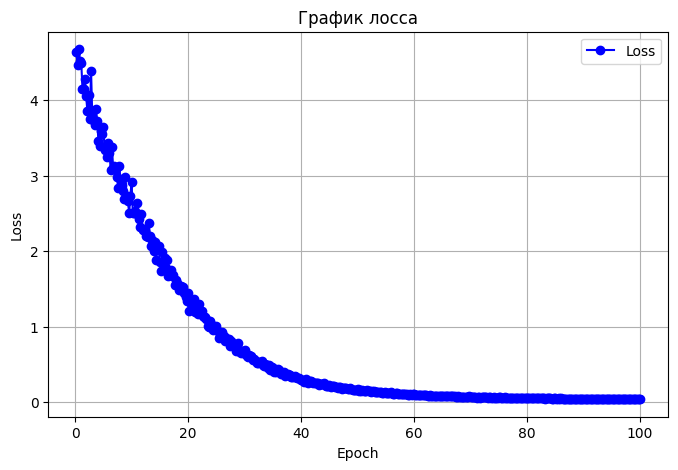

In [28]:
epochs = [entry['epoch'] for entry in data_first['log_history']]
losses = [entry['loss'] for entry in data_first['log_history']]

plt.figure(figsize=(8, 5))
plt.plot(epochs, losses, marker='o', linestyle='-', color='b', label='Loss')
plt.title('График лосса')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

Оригинальный текст:
Вашу мысль,
мечтающую на размягченном мозгу,
как выжиревший лакей на засаленной кушетке,
буду дразнить об окровавленный сердца лоскут:
досыта изъиздеваюсь, нахальный и едкий.
У меня в душе ни одного седого волоса,
и старческой нежности нет в ней!
Мир огромив мощью голоса,
иду — красивый,
двадцатидвухлетний.

То что получилось

In [29]:
prompt = "Вашу мысль, мечтающую на размягченном мозгу"

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Вашу мысль, мечтающую на размягченном мозгу 

вспыхнуть 

как свеча 

и озарить 

небо 

и землю 

и небо 

и воздух 

и все 

что 

на земле 

и на небе 

и что 

на небе 

 

ПРИКАЗ 

О ПОРЯДКЕ 

ОБРАЩАЮЩЕЙСЯ 

ОТВЕТСТВЕННОСТЬЮ 

ОРГАНИЗАЦИИ 

ОТКАЗЫВАЮЩИХСЯ 

ПОСЛЕ


Вы думаете, это бредит малярия?
Это было,
было в Одессе.
«Приду в четыре», — сказала Мария.
Восемь.
Девять.
Десять.
Вот и вечер
в ночную жуть
ушел от окон,
хмурый,
декабрый.
В дряхлую спину хохочут и ржут
канделябры.

In [30]:
prompt = "Вы думаете, это бредит малярия? Это было, было в Одессе."

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Вы думаете, это бредит малярия? Это было, было в Одессе.

— Да нет же, это не бредит, — сказал я. — Это не бредит туберкулезом. Это не туберкулезом болеет туберкулезом туберкулезом


.



ПОСЛЕДНЯЯ ПОЭЗИЯ


ПИСАТЕЛЮ

Писатель

Я не поэт

Я писатель

Я художник

Я поэт


Я пишу

Я живу

Я дышу

Я вижу

Я слышу

Я чувствую

Я знаю



Любовь любому рожденному дадена, —
но между служб,
доходов
и прочего
со дня на день
очерствевает сердечная почва.
На сердце тело надето,
на тело — рубаха.
Но и этого мало!

In [31]:
prompt = "Любовь любому рожденному дадена, —но между служб, доходов"

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Любовь любому рожденному дадена, —но между служб, доходов и т.д. и т.п. 

Стихотворения 

Париж 

Я люблю Париж 

Я знаю 

что в нем 

всегда 

счастье 

и покой 

и радость 

и счастье 

и любовь 

и жизнь 

и смерть 

и я 

и Париж 

 

ПОСВЯЩАЙТЕСЬ 

ПАРИЖУ 

ПРИКАЗ 

ОБРАЩАЮТСЯ 

ОТКРЫВАЮЩИЕ


Я в меру любовью был одаренный.
Но с детства
людьё
трудами муштровано.
А я —
убег на берег Риона
и шлялся,
ни чёрта не делая ровно.
Сердилась мама:
«Мальчишка паршивый!»

In [32]:
prompt = "Я в меру любовью был одаренный.Но с детства людьё"

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Я в меру любовью был одаренный.Но с детства людьё привыкло к тому, что у каждого из нас есть своя судьба и своя судьба. 




ПОСЛЕДНЯЯ ПОЭЗИЯ 

 

ПИСАТЕЛИ 

ПРИКАЗ 

ОБРАЩАЮТСЯ 

ОТВЕТСТВЕННОСТЬЮ 

ОТКРЫВАЮЩЕЙСЯ 

ПОЭЗИИ 

ПРЕДСТАВИТЕЛЯМ 

ОРГАНИЗАЦИИ 

НАШЕМУ ГОСУДАРСТВУ 

Обращаюсь к


# Perplexity

## Сравним с предыдущими результатами

In [33]:
prompt = '''Парижские "Последние новости" пишут: 

"Шаляпин пожертвовал священнику 

Георгию Спасскому на русских 

безработных в Париже 5000 франков. '''

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
print("\n","Perplexity сгенерированного текста:", calculate_perplexity(generated_text))



Парижские "Последние новости" пишут: 

"Шаляпин пожертвовал священнику 

Георгию Спасскому на русских 

безработных в Париже 5000 франков. 
Парижане 

в восторге 

от этого 

отца 

и от матери 

от отца 

от матери 

Отца 

от мамы 

от папы 

от бабушки 

от дедушки 

от деда 

от прабабушки 

от прадедушки 

и т.д." 

 

ПОСВЯЩАЕТСЯ 

МАРКЕТИНУ 

СЕРГЕЮ СЕРГЕЕВИЧУ 

ПАРИЖАНУ 

Я 

 Perplexity сгенерированного текста: 5.622627258300781


In [34]:
prompt = '''НУ, ЧТО Ж! 

Раскрыл я 

с тихим шорохом глаза страниц... И потянуло 

порохом от всех границ. 
 '''

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
print("\n","Perplexity сгенерированного текста:", calculate_perplexity(generated_text))


НУ, ЧТО Ж! 

Раскрыл я 

с тихим шорохом глаза страниц... И потянуло 

порохом от всех границ. 
  

ПРИКАЗ 

О ГОСУДАРСТВЕННОЙ ДЕЯТЕЛЬНОСТИ 

ОБРАЩАЮТСЯ 

ОТВЕТСТВУЮЩИЕ НА ЗАПАДНЫЕ ВОПРОСЫ 

ОРГАНИЗАЦИОННЫЙ ОТВЕТСТВЕННОСТЬ 

ВСЕМ 

ЗАПАДНЫМ 

ОТНОШЕНИЕМ 

К СОЦИАЛИСТИЧЕСКОМУ СОЦИАЛЬНОМУ СООБЩЕСТВУ 

ОСОБЕННОСТИ

 Perplexity сгенерированного текста: 5.264039993286133


In [35]:
prompt = '''Куда бы 

ты 

ни направил разбег, и как ни ерзай, и где ногой ни ступи,есть Марксов проспект, и улица Розы, и Луначарского 

переулок или тупик. Где я?  '''

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
print("\n","Perplexity сгенерированного текста:", calculate_perplexity(generated_text))



Куда бы 

ты 

ни направил разбег, и как ни ерзай, и где ногой ни ступи,есть Марксов проспект, и улица Розы, и Луначарского 

переулок или тупик. Где я?   

ПРИКАЗ 

ОБРАЩАЙСЯ 

ОТВЕТСТВЕННОСТЬЮ 

ОТКАЗЫВАЙТЕСЬ 

ПОСЛЕДНИЙ 

ПОСТАНОВЛЕНИЕ 

О ГОСУДАРСТВЕННОМ ПОРЯДКЕ 

ОРГАНИЗАЦИИ 

ОГЛАВЛЯЙТЕ 

ЗАЯВЛЕНИЯ 

О РЕВОЛЮЦИОННОМ СОВЕТСКОМ РЕСПУБЛИКЕ 

Граж

 Perplexity сгенерированного текста: 7.13775110244751


In [36]:
prompt = '''Я  два месяца 

шатался по природе, чтоб смотреть цветы 

и звезд огнишки. Таковых не видел. 

Вся природа вроде телефонной книжки. Везде  '''

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
print("\n","Perplexity сгенерированного текста:", calculate_perplexity(generated_text))


Я  два месяца 

шатался по природе, чтоб смотреть цветы 

и звезд огнишки. Таковых не видел. 

Вся природа вроде телефонной книжки. Везде   провода 

похожи 

на провода 

и на провода 

от батарей 

до проводов 

от проводов от батарей 

от батареек 

от ламп 

от лампочек 

от розеток 

от люстр 

от бра 

от свечей 

от свеч 

от керосина 

от бензина 

от воды 

от газа 

от нефти 

от угля 

от железа 

от свинца 

от золота 

от серебра 

от платины 

от меди 


 Perplexity сгенерированного текста: 7.074525356292725


In [37]:
prompt = '''Вижу, как сейчас, 

объедки да бутылки... В портишке, 

известном 

лишь кабачком, Коломб Христофор  '''

input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)
print("\n","Perplexity сгенерированного текста:", calculate_perplexity(generated_text))



Вижу, как сейчас, 

объедки да бутылки... В портишке, 

известном 

лишь кабачком, Коломб Христофор   

Будьте любезны 

принесите 

свежий 

сухарик 

и 

свежевыжатый 

соль 

и сахар 

с сахаром 

с солью 

с перцем 

с лимоном 

с гвоздикой 

с корицей 

с мускатным орехом 

с цедрой апельсина 

с апельсинами 

и цедрой лимонов 

с вишнями 

с абрикосами 

с грушами 



 Perplexity сгенерированного текста: 6.2791290283203125


Как мы видим, perplexity многократно выросла.

# Виды эмоциональных окрасок

In [38]:
prompts = [
    "Осенний вечер за окном,", 
    "Под небом звездным снова я,", 
    "В закатном блеске свет луны,"
]

for prompt in prompts:
    input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

    output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)

    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    print(f"Начало: {prompt}\nСгенерированный текст:\n{generated_text}\n")


Начало: Осенний вечер за окном,
Сгенерированный текст:
Осенний вечер за окном, 

Птичий крик за окном 

Осенний день за окном  

 

ПОСВЯЩАЙТЕСЬ 

ОБРАЩАЮЩИМСЯ 

ОТВЕТСТВУЮЩИМ 

ОТСЮДА 

ОТ АВТОРА 

ПИСАТЕЛЮ 

СЕРГЕЮ СЕРГЕЕВИЧУ 

ПРЕДИСЛОВИЕ 

О СОВЕТСКОМ ГОСУДАРСТВЕННОМ СОЮЗЕ 

ОСОБОЕ

Начало: Под небом звездным снова я,
Сгенерированный текст:
Под небом звездным снова я, 

и снова я 

и опять я 

И снова я снова я снова 

И опять я снова я вновь 

И вновь я снова я опять 

И Снова я снова я  снова  снова я снова  снова  опять  снова  я снова  

Снова я снова  и снова я  опять  и снова  я  снова

Снова я  снова и снова я снова и снова 

Снова и снова я опять и снова 

Снова и опять я снова и опять 

Опять и снова я вновь и снова  снова 



Начало: В закатном блеске свет луны,
Сгенерированный текст:
В закатном блеске свет луны, 

как будто 

вспышкой 

в небо 

врывается 

ввысь 

вселенная 

и небо 

и земля 

и все 

что 

на небе 

и на земле 

и что 

на земле 

 

ПОСВЯЩАЙТЕСЬ 

МА

# WORD CLOUD

In [39]:
original_text = '''Французский знаете.
Делите.
Множите.
Склоняете чудно.
Ну и склоняйте!
Скажите —
а с домом спеться
можете?
Язык трамвайский вы понимаете?
Птенец человечий
чуть только вывелся —
за книжки рукой,
за тетрадные дести.'''
input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

In [40]:
generated_text

'В закатном блеске свет луны, \n\nкак будто \n\nвспышкой \n\nв небо \n\nврывается \n\nввысь \n\nвселенная \n\nи небо \n\nи земля \n\nи все \n\nчто \n\nна небе \n\nи на земле \n\nи что \n\nна земле \n\n \n\nПОСВЯЩАЙТЕСЬ \n\nМАРКСИЗМУ \n\nПРЕДИСЛОВИЕ \n\nО СОВЕТСКОМ ГОСУДАРСТВЕ \n\nПРИКАЗ \n\nО ПОРЯДКЕ \n\n'

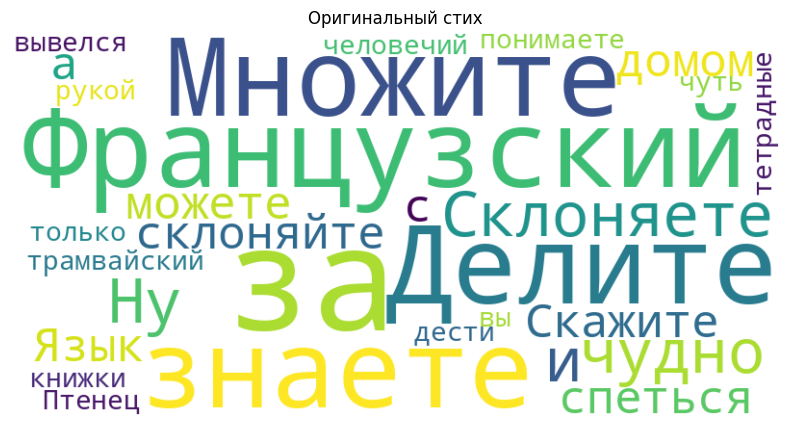

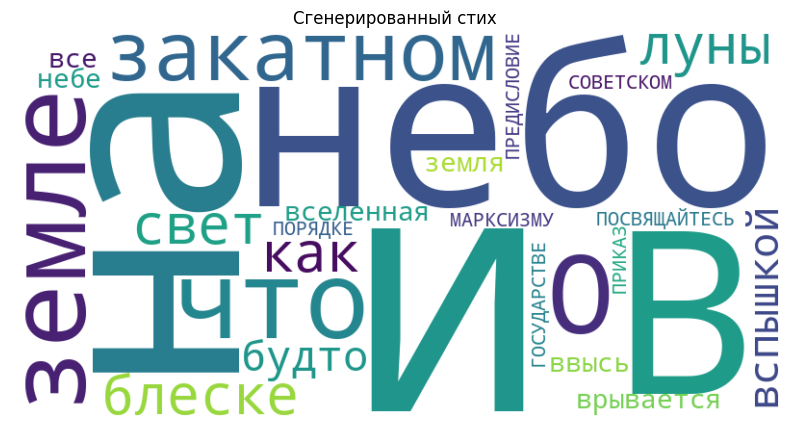

In [41]:
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_wordcloud(original_text, "Оригинальный стих")
plot_wordcloud(generated_text, "Сгенерированный стих")


# Inference time

In [42]:
import time
prompt = "Вечерний свет, как нежный сон,"
input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

num_runs = 10
times = []

for _ in range(num_runs):
    start_time = time.time()
    output = model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5).to(device)
    end_time = time.time()
    
    times.append(end_time - start_time)

average_inference_time = sum(times) / num_runs
print(f"Среднее время инференса: {average_inference_time:.4f} секунд")

Среднее время инференса: 5.4372 секунд


# Сравним с distillgpt2

In [43]:
small_model = GPT2LMHeadModel.from_pretrained("distilgpt2")
small_tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")

In [44]:
device = "cuda"
small_model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [45]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=small_tokenizer,
    mlm=False 
)

In [46]:
train_dataset = TextDataset(text, tokenizer=small_tokenizer, max_length=512, val_split=0.15, is_validation=False)
val_dataset = TextDataset(text, tokenizer=small_tokenizer, max_length=512, val_split=0.15, is_validation=True)



Token indices sequence length is longer than the specified maximum sequence length for this model (332044 > 1024). Running this sequence through the model will result in indexing errors


In [47]:
training_args = TrainingArguments(
    output_dir="./results2",
    overwrite_output_dir=True,
    num_train_epochs=15,
    per_device_train_batch_size=1,
    save_strategy="epoch",
    eval_strategy="epoch",
    save_total_limit=2, 
    logging_dir="./logs2",
    logging_steps=5,
    load_best_model_at_end=True, 
    metric_for_best_model="eval_loss",
    greater_is_better=False
)

In [48]:
class LossHistoryCallback(TrainerCallback):
    def __init__(self):
        self.losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs and "loss" in logs:
            self.losses.append(logs["loss"])
loss_callback =LossHistoryCallback()

In [49]:
small_tokenizer.add_special_tokens({'pad_token': '[PAD]'})
small_model.resize_token_embeddings(len(small_tokenizer))

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


Embedding(50258, 768)

In [50]:
trainer_small = Trainer(
    model=small_model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=data_collator,
    eval_dataset=val_dataset,
    callbacks=[loss_callback],
)


## загрузка лучшего чекпоинта

In [51]:
last_checkpoint = "./results/checkpoint-4140" 
model = GPT2LMHeadModel.from_pretrained(last_checkpoint)

In [52]:
small_tokenizer.pad_token = small_tokenizer.eos_token


In [53]:
small_model.resize_token_embeddings(len(small_tokenizer))

Embedding(50258, 768)

In [54]:
trainer_small.train()

Epoch,Training Loss,Validation Loss
1,2.099000,2.020028
2,2.098700,1.961477
3,1.974300,1.909866
4,1.965400,1.872439
5,1.952700,1.845739
6,1.863900,1.831000
7,1.888100,1.816699
8,1.793900,1.804741
9,1.822500,1.792450
10,1.767900,1.785500


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=8265, training_loss=1.8561847257527595, metrics={'train_runtime': 711.1003, 'train_samples_per_second': 11.623, 'train_steps_per_second': 11.623, 'total_flos': 1079808821821440.0, 'train_loss': 1.8561847257527595, 'epoch': 15.0})

In [55]:
save_directory = "./fine_tuned_model_small"

small_model.save_pretrained(save_directory)

small_tokenizer.save_pretrained(save_directory)

('./fine_tuned_model_small/tokenizer_config.json',
 './fine_tuned_model_small/special_tokens_map.json',
 './fine_tuned_model_small/vocab.json',
 './fine_tuned_model_small/merges.txt',
 './fine_tuned_model_small/added_tokens.json')

In [56]:
import json
import matplotlib.pyplot as plt
with open('results2/checkpoint-4140/trainer_state.json', 'r', encoding='utf-8') as file:
    data_second = json.load(file)
data_second

{'best_metric': None,
 'best_model_checkpoint': None,
 'epoch': 100.0,
 'eval_steps': 500,
 'global_step': 32500,
 'is_hyper_param_search': False,
 'is_local_process_zero': True,
 'is_world_process_zero': True,
 'log_history': [{'epoch': 0.015384615384615385,
   'grad_norm': 8.631863594055176,
   'learning_rate': 4.9992307692307693e-05,
   'loss': 2.4401,
   'step': 5},
  {'epoch': 0.03076923076923077,
   'grad_norm': 5.350144386291504,
   'learning_rate': 4.9984615384615385e-05,
   'loss': 2.3803,
   'step': 10},
  {'epoch': 0.046153846153846156,
   'grad_norm': 4.793355941772461,
   'learning_rate': 4.9976923076923076e-05,
   'loss': 2.254,
   'step': 15},
  {'epoch': 0.06153846153846154,
   'grad_norm': 4.3565192222595215,
   'learning_rate': 4.9969230769230773e-05,
   'loss': 2.254,
   'step': 20},
  {'epoch': 0.07692307692307693,
   'grad_norm': 5.856595039367676,
   'learning_rate': 4.9961538461538465e-05,
   'loss': 2.3024,
   'step': 25},
  {'epoch': 0.09230769230769231,
   'gr

In [57]:
# last_checkpoint = "./results2/checkpoint-4140" 
# model = GPT2LMHeadModel.from_pretrained(last_checkpoint)

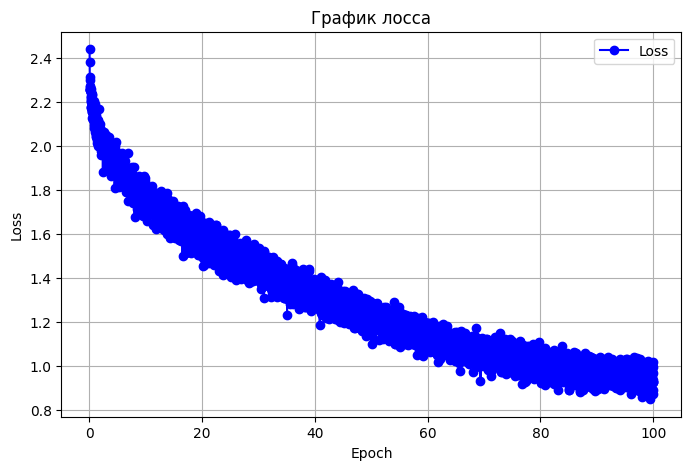

In [58]:

epochs = [entry['epoch'] for entry in data_second['log_history']]
losses = [entry['loss'] for entry in data_second['log_history']]

plt.figure(figsize=(8, 5))
plt.plot(epochs, losses, marker='o', linestyle='-', color='b', label='Loss')
plt.title('График лосса')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [59]:
small_model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50258, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50258, bias=False)
)

In [60]:
prompt = "Поднял силачом, понес акробатом. Как избирателей сзывают на митинг,"
input_ids = small_tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)["input_ids"]
attention_mask = small_tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)["attention_mask"]


In [61]:
if torch.cuda.is_available():
    small_model = small_model.to("cuda")
    input_ids = input_ids.to("cuda")
    attention_mask = attention_mask.to("cuda")

In [62]:
output = small_model.generate(input_ids, max_new_tokens=120, num_return_sequences=4, no_repeat_ngram_size=4,num_beams = 5,attention_mask = attention_mask).to(device)


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [63]:
generated_text = small_tokenizer.decode(output[0], skip_special_tokens=True)
print("Сгенерированный текст distilgpt2:")
print(generated_text)

Сгенерированный текст distilgpt2:
Поднял силачом, понес акробатом. Как избирателей сзывают на митинг, как бумажки 

Не простите покаждый последники черный революции строительно работаться не поэтому распублики


In [64]:
def calculate_perplexity_distilbert(text):
    inputs = small_tokenizer(text, return_tensors="pt")["input_ids"]
    device = "cuda" if torch.cuda.is_available() else "cpu"
    small_model.to(device)
    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = small_model(inputs, labels=inputs)
        loss = outputs.loss
        perplexity = torch.exp(loss)
    
    return perplexity.item()

print("Perplexity сгенерированного текста:", calculate_perplexity_distilbert(generated_text))


Perplexity сгенерированного текста: 4.6412553787231445


# Часть 2

In [65]:
from transformers import GPT2Tokenizer, AutoTokenizer

tokenizer_rubert = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

text_sample = "Поднял силачом, понес акробатом. Как избирателей сзывают на митинг"




В гпт-2 используется Byte Pair Encoding, поэтому для корректности будет использовать числовое представление токенизированных слов(а-ля bag of words), которые существуют у каждого токенизатора. BPE на уровне байтов преобразует все кодовые точки Unicode в несколько символов на уровне байтов:

Каждая кодовая точка Unicode разбивается на байты (1 байт для символов ASCII и до 4 байтов для кодовых точек Unicode UTF-8).
Каждое значение байта получает "видимый" символ, назначенный ему с начала таблицы Unicode. Это особенно важно, поскольку существует множество управляющих символов, поэтому мы не можем просто сопоставить символ таблицы ASCII <-> значение байта. Поэтому некоторые символы получают другие представления, например, пробел U+0020становится Ġ.
Цель в том, что, делая это, мы получаем начальный алфавит из 256 токенов. Эти 256 токенов затем можно объединить вместе, чтобы представить любой другой токен в словаре. Это приводит к меньшим словарям, которым никогда не понадобится «неизвестный» токен.

In [66]:
print("Токенизация GPT2:")
print(tokenizer.tokenize(text_sample))

Токенизация GPT2:
['ÐŁÐ¾Ð´', 'Ð½ÑıÐ»', 'ĠÑģÐ¸Ð»Ð°', 'ÑĩÐ¾Ð¼', ',', 'ĠÐ¿Ð¾Ð½ÐµÑģ', 'ĠÐ°Ðº', 'ÑĢÐ¾Ð±', 'Ð°ÑĤÐ¾Ð¼', '.', 'ĠÐļÐ°Ðº', 'ĠÐ¸Ð·Ð±Ð¸ÑĢÐ°ÑĤÐµÐ»ÐµÐ¹', 'ĠÑģ', 'Ð·', 'ÑĭÐ²Ð°ÑİÑĤ', 'ĠÐ½Ð°', 'ĠÐ¼Ð¸ÑĤÐ¸Ð½Ð³']


In [67]:
print("\nТокенизация RuBERT:")
print(tokenizer_rubert.tokenize(text_sample))


Токенизация RuBERT:
['Под', '##нял', 'сила', '##чо', '##м', ',', 'понес', 'акробат', '##ом', '.', 'Как', 'избирателей', 'с', '##зы', '##ва', '##ют', 'на', 'митинг']


In [68]:
print("\nТокенизация distillgpt2:")
print(small_tokenizer.tokenize(text_sample))


Токенизация distillgpt2:
['Ð', 'Ł', 'Ð¾Ð', '´', 'Ð½', 'Ñı', 'Ð»', 'Ġ', 'Ñģ', 'Ð¸', 'Ð»', 'Ð°', 'Ñ', 'ĩ', 'Ð¾Ð', '¼', ',', 'ĠÐ', '¿', 'Ð¾', 'Ð½', 'Ðµ', 'Ñģ', 'ĠÐ', '°', 'Ðº', 'ÑĢ', 'Ð¾Ð', '±', 'Ð°', 'ÑĤ', 'Ð¾Ð', '¼', '.', 'ĠÐ', 'ļ', 'Ð°', 'Ðº', 'ĠÐ', '¸', 'Ð', '·', 'Ð', '±', 'Ð¸', 'ÑĢ', 'Ð°', 'ÑĤ', 'Ðµ', 'Ð»', 'Ðµ', 'Ð', '¹', 'Ġ', 'Ñģ', 'Ð', '·', 'Ñĭ', 'Ð²', 'Ð°', 'Ñ', 'İ', 'ÑĤ', 'ĠÐ', '½', 'Ð°', 'ĠÐ', '¼', 'Ð¸', 'ÑĤ', 'Ð¸', 'Ð½', 'Ð', '³']


In [69]:
tokenizer.decode(tokenizer(text_sample, return_tensors="pt")["input_ids"][0],skip_special_tokens=True)

'Поднял силачом, понес акробатом. Как избирателей сзывают на митинг'

In [70]:
small_tokenizer.decode(small_tokenizer(text_sample, return_tensors="pt")["input_ids"][0],skip_special_tokens=True)

'Поднял силачом, понес акробатом. Как избирателей сзывают на митинг'

Увеличим окно токенизации второй модели

In [71]:
small_model = GPT2LMHeadModel.from_pretrained("distilgpt2")
small_tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")

In [79]:
train_dataset = TextDataset(text, tokenizer=small_tokenizer, max_length=1024, val_split=0.15, is_validation=False)
val_dataset = TextDataset(text, tokenizer=small_tokenizer, max_length=1024, val_split=0.15, is_validation=True)

In [81]:
trainer_small = Trainer(
    model=small_model,
    args=training_args,
    train_dataset=train_dataset,
    data_collator=data_collator,
    eval_dataset=val_dataset,
    callbacks=[loss_callback],
)


In [78]:
small_tokenizer.pad_token_id = small_tokenizer.eos_token_id


In [82]:
trainer_small.train()

Epoch,Training Loss,Validation Loss
1,2.087000,1.982735
2,1.981400,1.946381
3,1.961900,1.923971
4,1.955200,1.898183
5,1.918600,1.872632
6,1.870000,1.860411
7,1.813800,1.854664
8,1.827600,1.834570
9,1.780700,1.832760
10,1.843300,1.826264


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=4140, training_loss=1.8680829861313824, metrics={'train_runtime': 549.9043, 'train_samples_per_second': 7.529, 'train_steps_per_second': 7.529, 'total_flos': 1081768547450880.0, 'train_loss': 1.8680829861313824, 'epoch': 15.0})

In [85]:
small_model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-5): 6 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [86]:
prompt = "Поднял силачом, понес акробатом. Как избирателей сзывают на митинг,"
input_ids = small_tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)["input_ids"]
attention_mask = small_tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)["attention_mask"]


In [87]:
if torch.cuda.is_available():
    small_model = small_model.to("cuda")
    input_ids = input_ids.to("cuda")
    attention_mask = attention_mask.to("cuda")

In [96]:
output = small_model.generate(input_ids, max_new_tokens=50, attention_mask=attention_mask)


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [98]:
generated_text = small_tokenizer.decode(output[0], skip_special_tokens=True)
print("Сгенерированный текст distilgpt2:")
print(generated_text)

Сгенерированный текст distilgpt2:
Поднял силачом, понес акробатом. Как избирателей сзывают на митинг, под как и не под как и не под как и не под как и �


In [99]:
def calculate_perplexity_distilbert(text):
    inputs = small_tokenizer(text, return_tensors="pt")["input_ids"]
    device = "cuda" if torch.cuda.is_available() else "cpu"
    small_model.to(device)
    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = small_model(inputs, labels=inputs)
        loss = outputs.loss
        perplexity = torch.exp(loss)
    
    return perplexity.item()

print("Perplexity сгенерированного текста:", calculate_perplexity_distilbert(generated_text))


Perplexity сгенерированного текста: 7.912549018859863
